In [16]:
import pandas as pd

tabela = pd.read_csv("clientes.csv") # importa a base de dados
display(tabela)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [17]:
# verificar se temos valores vazios ou valores reconhecidos em formato errado
print(tabela.info())
print(tabela.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

In [18]:
from sklearn.preprocessing import LabelEncoder

#vai transformar as colunas de texto em números
encoder = LabelEncoder()

#só não aplica no score_credito, pois é nosso objetivo (variável de saída)
for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "score_credito":
        tabela[coluna] = encoder.fit_transform(tabela[coluna])
        
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int32  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int32  
 13  divida_total              100000 non-null  fl

In [19]:
# escolhendo quais colunas vamos usar para treinar o modelo
# y é a coluna que queremos que o modelo calcule
# x vai todas as colunas que vamos usar para prever o score de credito, 
# não vamos usar a coluna id_cliente porque ela é um numero qualquer que nao ajuda a previsao

X = tabela.drop(["score_credito", "id_cliente"], axis=1)
y = tabela["score_credito"]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

RF = RandomForestClassifier()
KNN = KNeighborsClassifier()

#training models

RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# se o nosso modelo chutasse tudo "Standard", qual seria a acurácia do modelo?
contagem_scores = tabela["score_credito"].value_counts()
print(contagem_scores["Standard"]/sum(contagem_scores))

0.53174


In [24]:
from sklearn.metrics import accuracy_score

#predict
RF_predict = RF.predict(X_test)
KNN_predict = KNN.predict(X_test.to_numpy()) #why numpy??

print(accuracy_score(y_test, RF_predict))
print(accuracy_score(y_test, KNN_predict))

C:\Users\jur.leticianobre\Downloads\DataApp\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8332
0.75085


In [34]:
# quais as caracteristicas mais importantes para definir o score de credito?
colunas = list(X_test.columns)
importancia = pd.DataFrame(index=colunas, data=RF.feature_importances_)
importancia = importancia * 100
print(importancia)

                                  0
mes                        3.986089
idade                      4.269927
profissao                  3.250734
salario_anual              5.035766
num_contas                 3.261804
num_cartoes                4.584477
juros_emprestimo           7.740589
num_emprestimos            2.983736
dias_atraso                6.467631
num_pagamentos_atrasados   4.577262
num_verificacoes_credito   4.299541
mix_credito                8.540101
divida_total              12.353930
taxa_uso_credito           5.070512
idade_historico_credito    7.434234
investimento_mensal        4.853015
comportamento_pagamento    2.360993
saldo_final_mes            5.408004
emprestimo_carro           0.716629
emprestimo_casa            0.731034
emprestimo_pessoal         0.704816
emprestimo_credito         0.687710
emprestimo_estudantil      0.681465


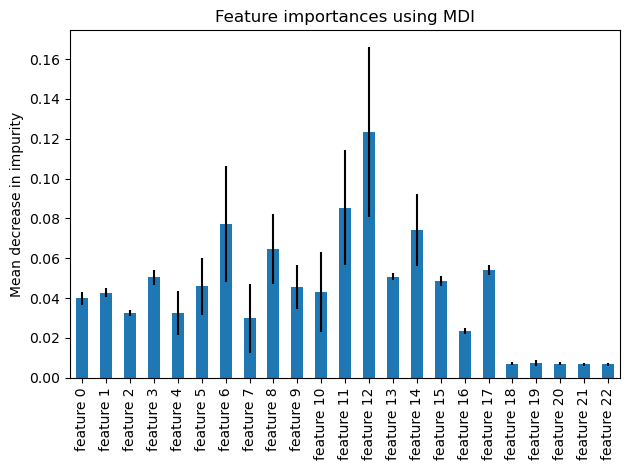

In [30]:
from matplotlib import pyplot as plt
import numpy as np

feature_names = [f"feature {i}" for i in range(X.shape[1])]

importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [38]:
print(importancia.loc[(importancia["0"] >= 7)])

KeyError: '0'